In [1]:
# Import modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from google.colab import drive
from sklearn.preprocessing import LabelEncoder

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Tentukan path ke dataset yang ada di Google Drive
path_to_dataset = '/content/drive/MyDrive/Dataset/CreditDataset.csv'

# Baca dataset menggunakan pandas
df = pd.read_csv(path_to_dataset)
# Tampilkan 5 data awal
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]


In [3]:
# Pisahkan fitur (X) dan target (y)
X = df.iloc[:, :-1]  # Semua kolom kecuali 'Class'
y = df.iloc[:, -1]   # Kolom 'Class' sebagai target

In [4]:
# Split data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan ukuran data hasil split
print(f"Ukuran data training: {X_train.shape}")
print(f"Ukuran data testing: {X_test.shape}")

Ukuran data training: (800, 20)
Ukuran data testing: (200, 20)


In [5]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Iterasi pada setiap kolom di dataset yang memiliki tipe data object (string)
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Tampilkan dataset setelah encoding
print(X.head())

   x1  x2  x3  x4    x5  x6  x7  x8  x9  x10  x11  x12  x13  x14  x15  x16  \
0   0   6   4   4  1169   4   4   4   2    0    4    0   67    2    1    2   
1   1  48   2   4  5951   0   2   2   1    0    2    0   22    2    1    1   
2   3  12   4   7  2096   0   3   2   2    0    3    0   49    2    1    1   
3   0  42   2   3  7882   0   3   2   2    2    4    1   45    2    2    1   
4   0  24   3   0  4870   0   2   3   2    0    4    3   53    2    2    2   

   x17  x18  x19  x20  
0    2    1    1    0  
1    2    1    0    0  
2    1    2    0    0  
3    2    2    0    0  
4    2    2    0    0  


In [6]:
# Split data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan ukuran data hasil split
print(f"Ukuran data training: {X_train.shape}")
print(f"Ukuran data testing: {X_test.shape}")

Ukuran data training: (800, 20)
Ukuran data testing: (200, 20)


In [7]:
# Inisialisasi model SVM dengan kernel linear
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train model menggunakan data training
svm_model.fit(X_train, y_train)

# Output informasi selesai training
print("Model SVM telah dilatih.")

Model SVM telah dilatih.


In [8]:
# Prediksi data testing
y_pred = svm_model.predict(X_test)

# Probabilitas prediksi untuk perhitungan AUC dan ROC
y_prob = svm_model.predict_proba(X_test)[:, 1]

In [9]:
# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

Confusion Matrix:
[[123  18]
 [ 27  32]]

Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.87      0.85       141
           2       0.64      0.54      0.59        59

    accuracy                           0.78       200
   macro avg       0.73      0.71      0.72       200
weighted avg       0.77      0.78      0.77       200

Akurasi: 0.775


AUC: 0.8250390671955764


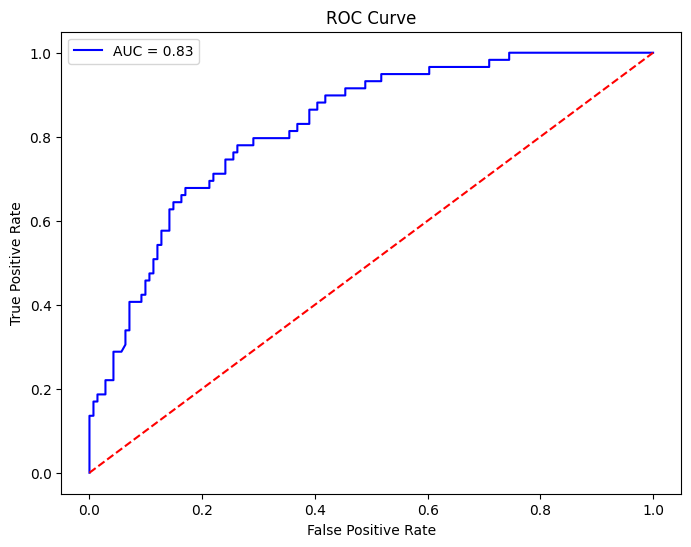

In [10]:
# Hitung AUC (dengan pos_label=2)
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc}")

# Plot ROC Curve (dengan pos_label=2)
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=2)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [11]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Lakukan encoding pada kolom kategori
for column in df.columns:
    if df[column].dtype == 'object':  # Hanya kolom bertipe string
        df[column] = label_encoder.fit_transform(df[column])

# Tampilkan dataset setelah encoding
print(df.head())

   x1  x2  x3  x4    x5  x6  x7  x8  x9  x10  ...  x12  x13  x14  x15  x16  \
0   0   6   4   4  1169   4   4   4   2    0  ...    0   67    2    1    2   
1   1  48   2   4  5951   0   2   2   1    0  ...    0   22    2    1    1   
2   3  12   4   7  2096   0   3   2   2    0  ...    0   49    2    1    1   
3   0  42   2   3  7882   0   3   2   2    2  ...    1   45    2    2    1   
4   0  24   3   0  4870   0   2   3   2    0  ...    3   53    2    2    2   

   x17  x18  x19  x20  Class  
0    2    1    1    0      1  
1    2    1    0    0      2  
2    1    2    0    0      1  
3    2    2    0    0      1  
4    2    2    0    0      2  

[5 rows x 21 columns]


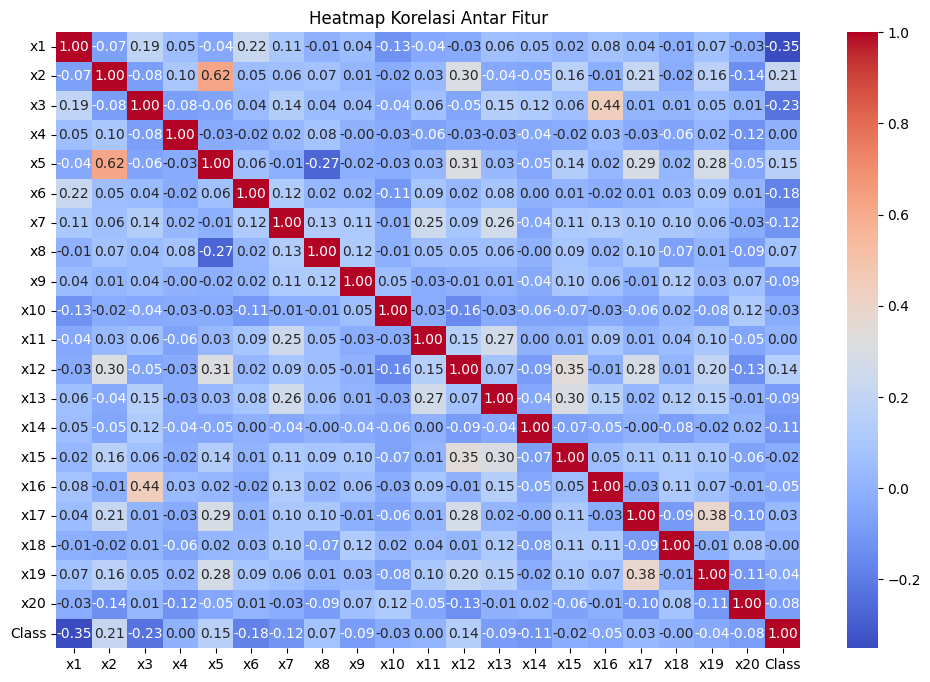

In [12]:
# Hitung korelasi
correlation_matrix = df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 8))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()